In [1]:
import numpy as np
from matplotlib import pyplot as plt
from perceptron import perceptron

In [2]:
def train_test_split(data, training_ratio=0.7):
    train_sample_size = np.int_(data.shape[0]*training_ratio)
    np.random.shuffle(data)
    #return training_samples, test_samples
    return data[:train_sample_size, :], data[train_sample_size:, :]


# Linearly seperable data for classification

In [3]:
file_class1 = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Classification/LS_Group10/Class1.txt'
file_class2 = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Classification/LS_Group10/Class2.txt'
file_class3 = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Classification/LS_Group10/Class3.txt'

In [4]:
class1_data = np.loadtxt(file_class1, delimiter=' ', dtype=float)
class2_data = np.loadtxt(file_class2, delimiter=' ', dtype=float)
class3_data = np.loadtxt(file_class3, delimiter=' ', dtype=float)

In [5]:
class1_data.shape, class2_data.shape, class3_data.shape

((500, 2), (500, 2), (500, 2))

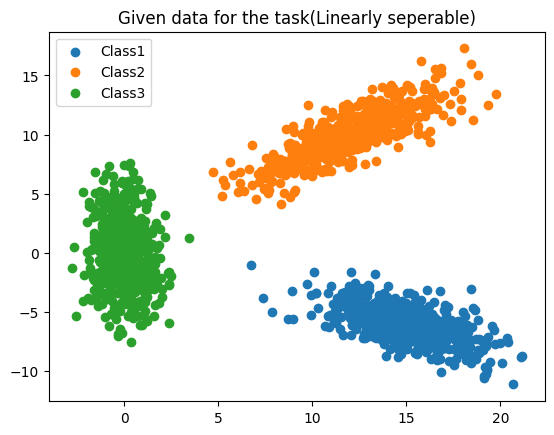

In [6]:
plt.scatter(class1_data[:, 0], class1_data[:, 1])
plt.scatter(class2_data[:, 0], class2_data[:, 1])
plt.scatter(class3_data[:, 0], class3_data[:, 1])
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Given data for the task(Linearly seperable)')
plt.show()

In [7]:
class1_train, class1_test = train_test_split(class1_data)
class2_train, class2_test = train_test_split(class2_data)
class3_train, class3_test = train_test_split(class3_data)

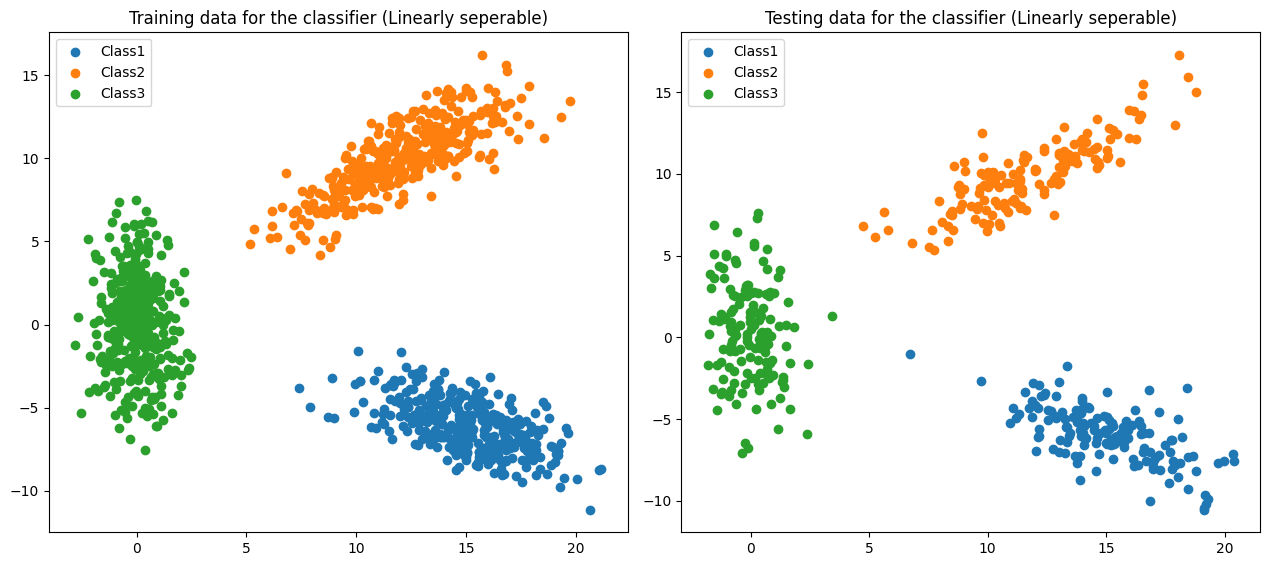

In [8]:
plt.subplot(1,2,1)
plt.scatter(class1_train[:, 0], class1_train[:, 1])
plt.scatter(class2_train[:, 0], class2_train[:, 1])
plt.scatter(class3_train[:, 0], class3_train[:, 1])
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Training data for the classifier (Linearly seperable)')

plt.subplot(1,2,2)
plt.scatter(class1_test[:, 0], class1_test[:, 1])
plt.scatter(class2_test[:, 0], class2_test[:, 1])
plt.scatter(class3_test[:, 0], class3_test[:, 1])
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Testing data for the classifier (Linearly seperable)')
plt.tight_layout(rect=[0, 0, 2, 1.2])
plt.show()

In [9]:
class classifer:
    def __init__(self, class1_train, class2_train, class3_train):
        self.class1v2 = perceptron(labels=(1, 2), n_features=2)
        # self.class2v3 = perceptron(labels=(2, 3))
        # self.class3v1 = perceptron(labels=(3, 1))
        self.epoch_err_1 = self.class1v2.fit(class1_train, class2_train)
        # self.epoch_err_2 = self.class2v3.fit(class2_train, class3_train)
        # self.epoch_err_3 = self.class3v1.fit(class3_train, class1_train)
        return None


In [10]:
# What the hell is happening?

In [11]:
l_classifier = classifer(class1_train, class2_train, class3_train)

In [12]:
len(l_classifier.epoch_err_1), # len(l_classifier.epoch_err_2), len(l_classifier.epoch_err_3)

(1,)

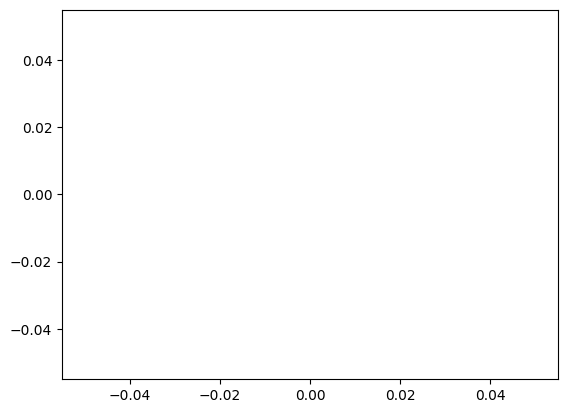

In [13]:
plt.plot(l_classifier.epoch_err_1)
# plt.plot(l_classifier.epoch_err_2)
# plt.plot(l_classifier.epoch_err_3)
plt.show()